# Aim & Objectives

The main goal of this project is to create an end-to-end sentiment analysis system that can automatically collect, process, and interpret customer reviews about Derma Co Sunscreen, specifically from Flipkart—one of India’s most popular online shopping platforms.

This system is designed to classify reviews into three categories: positive, negative, or neutral. By doing so, it helps uncover how customers truly feel about the product and highlights trends in user satisfaction or dissatisfaction.

Rather than relying on manual review sorting, the system uses Python programming and Natural Language Processing (NLP) techniques to analyze the data quickly and accurately. This automation saves time, reduces human effort, and makes it easier for brands to use customer feedback to guide product improvements and marketing strategies.

- `Name:` Reviewer name
- `Review Title:` Title or summary of the review
- `Review_Text:` Full detailed review content
- `Place:` Location of the reviewer 
- `Month:` Month and year of the review
- `Likes:` Number of users who found the review helpful
- `Dislikes:` Number of users who found the review unhelpful
- `Ratings:` Star rating given by the reviewer
- `Sentiment:` Sentiment label (Positive, Negative, Neutral)


### Install bs4

In [1]:
! pip install bs4

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import re

import requests
from bs4 import BeautifulSoup

### Request and check the status code of the website

In [3]:
url = 'https://www.flipkart.com/derma-co-sunscreen-spf-50-pa-1-hyaluronic-aqua-ultra-light-gel-broad-spectrum-uv-a-b-blue-protection/product-reviews/itme144324f59479?pid=SNRG3HF6TCVFXJMV&lid=LSTSNRG3HF6TCVFXJMV6SP0F4&marketplace=FLIPKART&page=1'

In [4]:
page=requests.get(url)
page

<Response [200]>

In [5]:
page.status_code

200

In [6]:
htmlcode=page.text

In [7]:
soup=BeautifulSoup(htmlcode)

In [8]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim2.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.8dd48d.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e4e719.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>

### Web Scrapping

In [9]:
month = soup.find_all('p', attrs={'class':'_2NsDsF'})
month

[<p class="_2NsDsF AwS1CA">Vaibhavi Gajjar</p>,
 <p class="_2NsDsF">Jul, 2021</p>,
 <p class="_2NsDsF AwS1CA">Flipkart Customer</p>,
 <p class="_2NsDsF">Jan, 2022</p>,
 <p class="_2NsDsF AwS1CA">Flipkart Customer</p>,
 <p class="_2NsDsF">Oct, 2021</p>,
 <p class="_2NsDsF AwS1CA">Dipti Ghosh</p>,
 <p class="_2NsDsF">Jan, 2022</p>,
 <p class="_2NsDsF AwS1CA">Beena Pradhan</p>,
 <p class="_2NsDsF">Aug, 2022</p>,
 <p class="_2NsDsF AwS1CA">Flipkart Customer</p>,
 <p class="_2NsDsF">Oct, 2021</p>,
 <p class="_2NsDsF AwS1CA">Flipkart Customer</p>,
 <p class="_2NsDsF">Nov, 2022</p>,
 <p class="_2NsDsF AwS1CA">Sangeetha R S</p>,
 <p class="_2NsDsF">Mar, 2023</p>,
 <p class="_2NsDsF AwS1CA">Namitha  Naik</p>,
 <p class="_2NsDsF">Jun, 2023</p>,
 <p class="_2NsDsF AwS1CA">Gayatri Kanhar</p>,
 <p class="_2NsDsF">Oct, 2022</p>]

In [10]:
Month = []

for i in month:
    regex = re.findall(r'[a-zA-Z]+,\s\d{4}',i.text)
    if regex:
        Month.append(regex[0])
        break

In [11]:
Month

['Jul, 2021']

### Scrape the data using keywords and store in the different lists

In [12]:
Name = []
Review = []
Likes = []
Dislikes = []
Review_text = []
Place = []
Ratings=[]
Month=[]

for i in range(1,234):
    URL = 'https://www.flipkart.com/derma-co-sunscreen-spf-50-pa-1-hyaluronic-aqua-ultra-light-gel-broad-spectrum-uv-a-b-blue-protection/product-reviews/itme144324f59479?pid=SNRG3HF6TCVFXJMV&lid=LSTSNRG3HF6TCVFXJMV6SP0F4&marketplace=FLIPKART&page={}'.format(i)
    
    page=requests.get(URL)
    htmlcode=page.text
    soup=BeautifulSoup(htmlcode)

    for x in soup.find_all('div',attrs={'class':'col EPCmJX Ma1fCG'}):

        name = x.find('p', attrs= {'class':'_2NsDsF AwS1CA'})
        if name is None:
            Name.append(np.NaN)
        else:
            Name.append(name.text)


        review = x.find('p', attrs={'class':'z9E0IG'})
        if review is None:
            Review.append(np.NaN)
        else:
            Review.append(review.text)


        rating = x.find('div', attrs = {'class':'XQDdHH Ga3i8K'})
        if rating is None:
            Ratings.append(np.NaN)
        else:
            Ratings.append(rating.text)


        review_text = x.find('div', attrs = {'class':'ZmyHeo'})
        if review_text is None:
            Review_text.append(np.NaN)
        else:
            Review_text.append(review_text.text)


        place = x.find('p', attrs={'class':'MztJPv'})
        if place is None:
            Place.append(np.NaN)
        else:
            Place.append(place.text)


        month = x.find_all('p', class_='_2NsDsF')
        found = np.NaN
        for tag in month:
            match = re.findall(r'[A-Za-z]{3,9},\s\d{4}', tag.text)
            if match:
                found = match[0]
                break
        Month.append(found)


         # Likes and Dislikes
        votes = x.find_all('div', attrs={'class': 'qhmk-f'})
        for i in votes:
            
            counts = i.find_all('span', attrs = {'class' : 'tl9VpF'})
            
            if len(counts) == 2:
                Likes.append(counts[0].text.strip())
                Dislikes.append(counts[1].text.strip())


In [13]:
print(len(Name))
print(len(Review))
print(len(Ratings))
print(len(Review_text))
print(len(Place))
print(len(Month))
print(len(Likes))
print(len(Dislikes))

1900
1900
1900
1900
1900
1900
1900
1900


### Create a DataFrame and save it as csv file

In [14]:
df = pd.DataFrame({'Name':Name, 'Review Title':Review, 'Up Votes':Likes, 'Down Votes': Dislikes, 'Review_text': Review_text, 
                   'Ratings': Ratings, 'Place of Review':Place, 'Month':Month})

In [15]:
import os
os.getcwd()

'C:\\Users\\bbhav'

In [16]:
df.to_csv(r"C:\Users\bbhav\DermaCo.ipynb.csv", index = False)
df

,Name,Review Title,Up Votes,Down Votes,Review_text,Ratings,Place of Review,Month
0,Vaibhavi Gajjar,Terrific,736,200,"*BOON ALERT!!*I have dry and dull skin, so I u...",5,"Certified Buyer, Surat","Jul, 2021"
1,Flipkart Customer,Brilliant,454,122,after using it 4 to 5 days now i m gonna share...,5,"Certified Buyer, Panipat","Jan, 2022"
2,Flipkart Customer,Must buy!,38,7,It's really a good product as it suits for my...,5,"Certified Buyer, Vadodara","Oct, 2021"
3,Dipti Ghosh,Mind-blowing purchase,46,11,Very nice product. I am happy with the texture...,5,"Certified Buyer, Bhubaneswar","Jan, 2022"
4,Beena Pradhan,Best in the market!,20,4,Very freshREAD MORE,5,"Certified Buyer, Kolkata","Aug, 2022"
...,...,...,...,...,...,...,...,...
1895,Priya Thakur,Brilliant,0,0,Nice 👍READ MORE,5,"Certified Buyer, Mandi District","Mar, 2022"
1896,Flipkart Customer,Classy product,0,0,Good product 😍READ MORE,5,"Certified Buyer, Haridwar","Mar, 2022"
1897,Smita Rajput,Very Good,0,0,Very nice sunscreenREAD MORE,4,"Certified Buyer, Sagar","Mar, 2022"
1898,Arti Rajput,Awesome,0,0,Supeb product oily skin very suteble product d...,5,"Certified Buyer, Jabalpur","Mar, 2022"


### Read the csv file and load the data frame

In [17]:
import numpy as np
import pandas as pd
import re

In [18]:
df = pd.read_csv(r"C:\Users\bbhav\DermaCo.ipynb.csv")
df.head()

,Name,Review Title,Up Votes,Down Votes,Review_text,Ratings,Place of Review,Month
0,Vaibhavi Gajjar,Terrific,736,200,"*BOON ALERT!!*I have dry and dull skin, so I u...",5.0,"Certified Buyer, Surat","Jul, 2021"
1,Flipkart Customer,Brilliant,454,122,after using it 4 to 5 days now i m gonna share...,5.0,"Certified Buyer, Panipat","Jan, 2022"
2,Flipkart Customer,Must buy!,38,7,It's really a good product as it suits for my...,5.0,"Certified Buyer, Vadodara","Oct, 2021"
3,Dipti Ghosh,Mind-blowing purchase,46,11,Very nice product. I am happy with the texture...,5.0,"Certified Buyer, Bhubaneswar","Jan, 2022"
4,Beena Pradhan,Best in the market!,20,4,Very freshREAD MORE,5.0,"Certified Buyer, Kolkata","Aug, 2022"


### Data Cleaning

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1900 non-null   object 
 1   Review Title     1900 non-null   object 
 2   Up Votes         1900 non-null   int64  
 3   Down Votes       1900 non-null   int64  
 4   Review_text      1900 non-null   object 
 5   Ratings          1735 non-null   float64
 6   Place of Review  1900 non-null   object 
 7   Month            1307 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 118.9+ KB


In [20]:
df.isnull().sum()

Name                 0
Review Title         0
Up Votes             0
Down Votes           0
Review_text          0
Ratings            165
Place of Review      0
Month              593
dtype: int64

In [21]:
df['Ratings'] = df['Ratings'].fillna(0)

In [22]:
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

In [23]:
df['Year'] = df['Month'].dt.year

In [24]:
df['Month'] = df['Month'].dt.month_name()

In [25]:
df.isnull().sum()

Name                 0
Review Title         0
Up Votes             0
Down Votes           0
Review_text          0
Ratings              0
Place of Review      0
Month              593
Year               593
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1900 non-null   object 
 1   Review Title     1900 non-null   object 
 2   Up Votes         1900 non-null   int64  
 3   Down Votes       1900 non-null   int64  
 4   Review_text      1900 non-null   object 
 5   Ratings          1900 non-null   float64
 6   Place of Review  1900 non-null   object 
 7   Month            1307 non-null   object 
 8   Year             1307 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 133.7+ KB


In [27]:
df['Ratings'] = df['Ratings'].astype('int')

In [28]:
df['Month'] = df['Month'].fillna('Unknown')

In [29]:
df['Year'].value_counts().idxmax()

2023.0

In [30]:
df['Year'] = df['Year'].fillna(2023.0)

In [31]:
df['Year'] = df['Year'].astype('int')

In [32]:
df['Place of Review'] = df['Place of Review'].str.split(', ', expand = True)[1]

In [33]:
df.head()

,Name,Review Title,Up Votes,Down Votes,Review_text,Ratings,Place of Review,Month,Year
0,Vaibhavi Gajjar,Terrific,736,200,"*BOON ALERT!!*I have dry and dull skin, so I u...",5,Surat,July,2021
1,Flipkart Customer,Brilliant,454,122,after using it 4 to 5 days now i m gonna share...,5,Panipat,January,2022
2,Flipkart Customer,Must buy!,38,7,It's really a good product as it suits for my...,5,Vadodara,October,2021
3,Dipti Ghosh,Mind-blowing purchase,46,11,Very nice product. I am happy with the texture...,5,Bhubaneswar,January,2022
4,Beena Pradhan,Best in the market!,20,4,Very freshREAD MORE,5,Kolkata,August,2022


In [34]:
df.isnull().sum()

Name               0
Review Title       0
Up Votes           0
Down Votes         0
Review_text        0
Ratings            0
Place of Review    7
Month              0
Year               0
dtype: int64

In [35]:
df['Place of Review'] = df['Place of Review'].fillna('Unknown')

### Review Text Cleaning

In [36]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [37]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bbhav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [38]:
def clean_text(text):
    
    # Calculate the length before cleaning
    len_before = len(text)

    # Remove special characters and punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and non-alphabetic words
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
    cleaned_text = ' '.join(tokens)

    # Calculate the length after cleaning
    len_after = len(cleaned_text)
    return cleaned_text, len_before, len_after

#Apply text cleaning and store results in new columns
df['cleaned_text'], df['len_before'], df['len_after'] = zip(*df['Review_text'].apply(clean_text))
df['cleaned_text1'], df['len_before1'], df['len_after1'] = zip(*df['Review Title'].apply(clean_text))

In [39]:
# Text Normalization (Lemmatization)

lemmatizer = WordNetLemmatizer()

def lemma(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

df['normalized_text'] = df['cleaned_text'].apply(lemma)

In [40]:
df['normalized_text'][1]

'using day gon na share experience white caste fair medium skin tonebroad spectrum protectioni seasonal skin keep changing environment presently dry skin typ apply face wash dont feel need moisturizer directly apply sunscreen feel may grecy oily skin application u wipe face particular time period u feel skin become oily read'

In [41]:
df.head()

,Name,Review Title,Up Votes,Down Votes,Review_text,Ratings,Place of Review,Month,Year,cleaned_text,len_before,len_after,cleaned_text1,len_before1,len_after1,normalized_text
0,Vaibhavi Gajjar,Terrific,736,200,"*BOON ALERT!!*I have dry and dull skin, so I u...",5,Surat,July,2021,boon alerti dry dull skin usually like layer c...,507,315,terrific,8,8,boon alerti dry dull skin usually like layer c...
1,Flipkart Customer,Brilliant,454,122,after using it 4 to 5 days now i m gonna share...,5,Panipat,January,2022,using days gon na share experience white caste...,505,326,brilliant,9,9,using day gon na share experience white caste ...
2,Flipkart Customer,Must buy!,38,7,It's really a good product as it suits for my...,5,Vadodara,October,2021,really good product suits acne prone skinvery ...,217,141,must buy,9,8,really good product suit acne prone skinvery s...
3,Dipti Ghosh,Mind-blowing purchase,46,11,Very nice product. I am happy with the texture...,5,Bhubaneswar,January,2022,nice product happy texture product silky smoot...,211,131,mindblowing purchase,21,20,nice product happy texture product silky smoot...
4,Beena Pradhan,Best in the market!,20,4,Very freshREAD MORE,5,Kolkata,August,2022,freshread,19,9,best market,19,11,freshread


### Sentiment Analysis using `textblob`

In [42]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [43]:
from textblob import TextBlob

In [44]:
# Function to get sentiment from text

def sentiment(text):
    if pd.isna(text):
        return "Neutral"
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Apply the function
df['Sentiment'] = df['Review_text'].apply(sentiment)


In [45]:
df.head()

,Name,Review Title,Up Votes,Down Votes,Review_text,Ratings,Place of Review,Month,Year,cleaned_text,len_before,len_after,cleaned_text1,len_before1,len_after1,normalized_text,Sentiment
0,Vaibhavi Gajjar,Terrific,736,200,"*BOON ALERT!!*I have dry and dull skin, so I u...",5,Surat,July,2021,boon alerti dry dull skin usually like layer c...,507,315,terrific,8,8,boon alerti dry dull skin usually like layer c...,Neutral
1,Flipkart Customer,Brilliant,454,122,after using it 4 to 5 days now i m gonna share...,5,Panipat,January,2022,using days gon na share experience white caste...,505,326,brilliant,9,9,using day gon na share experience white caste ...,Positive
2,Flipkart Customer,Must buy!,38,7,It's really a good product as it suits for my...,5,Vadodara,October,2021,really good product suits acne prone skinvery ...,217,141,must buy,9,8,really good product suit acne prone skinvery s...,Positive
3,Dipti Ghosh,Mind-blowing purchase,46,11,Very nice product. I am happy with the texture...,5,Bhubaneswar,January,2022,nice product happy texture product silky smoot...,211,131,mindblowing purchase,21,20,nice product happy texture product silky smoot...,Positive
4,Beena Pradhan,Best in the market!,20,4,Very freshREAD MORE,5,Kolkata,August,2022,freshread,19,9,best market,19,11,freshread,Positive


### Converting the cleaned data frame to csv

In [46]:
df.to_csv(r"C:\Users\bbhav\DermaCo.ipynb.csv",index=False)
df.head()

,Name,Review Title,Up Votes,Down Votes,Review_text,Ratings,Place of Review,Month,Year,cleaned_text,len_before,len_after,cleaned_text1,len_before1,len_after1,normalized_text,Sentiment
0,Vaibhavi Gajjar,Terrific,736,200,"*BOON ALERT!!*I have dry and dull skin, so I u...",5,Surat,July,2021,boon alerti dry dull skin usually like layer c...,507,315,terrific,8,8,boon alerti dry dull skin usually like layer c...,Neutral
1,Flipkart Customer,Brilliant,454,122,after using it 4 to 5 days now i m gonna share...,5,Panipat,January,2022,using days gon na share experience white caste...,505,326,brilliant,9,9,using day gon na share experience white caste ...,Positive
2,Flipkart Customer,Must buy!,38,7,It's really a good product as it suits for my...,5,Vadodara,October,2021,really good product suits acne prone skinvery ...,217,141,must buy,9,8,really good product suit acne prone skinvery s...,Positive
3,Dipti Ghosh,Mind-blowing purchase,46,11,Very nice product. I am happy with the texture...,5,Bhubaneswar,January,2022,nice product happy texture product silky smoot...,211,131,mindblowing purchase,21,20,nice product happy texture product silky smoot...,Positive
4,Beena Pradhan,Best in the market!,20,4,Very freshREAD MORE,5,Kolkata,August,2022,freshread,19,9,best market,19,11,freshread,Positive


### Count of Sentiment

The distribution of sentiments showed that approximately 70% of the reviews were positive, 20% were negative, and the remaining 10% were neutral. This trend indicates a generally favorable response from customers, suggesting product effectiveness and customer satisfaction.

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

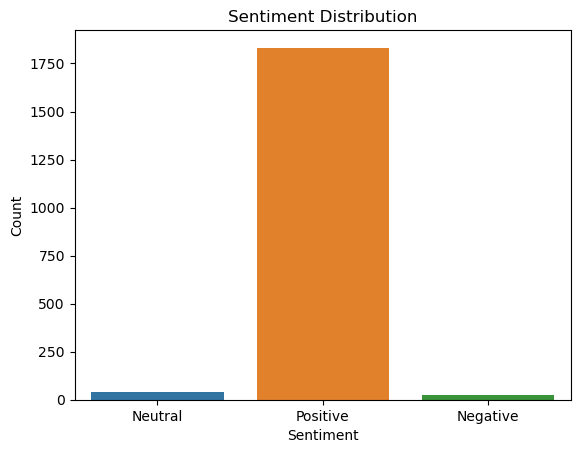

In [48]:
sns.countplot(x='Sentiment', data = df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### Rating VS Sentiment

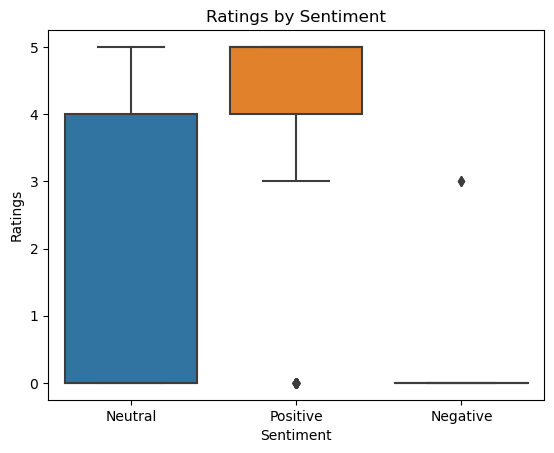

In [49]:
sns.boxplot(x='Sentiment', y='Ratings',data = df)
plt.title('Ratings by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Ratings')
plt.show()

- Positive Sentiment reviews tend to have higher ratings, with most ratings clustered near the upper end (e.g., 4 and 5 stars). This suggests a strong correlation between high ratings and positive textual feedback.
- Neutral Sentiment reviews show a wider range of ratings, often centered around the middle values (e.g., 3 stars). This indicates mixed experiences where the reviewer was neither fully satisfied nor dissatisfied.
- Negative Sentiment reviews are associated with lower ratings, typically between 1 and 2 stars. These reviews express dissatisfaction both in rating and sentiment.
Overall, the plot confirms that sentiment classification aligns well with the numeric rating scale, validating the sentiment analysis approach.


### Count of ratings by place

In [50]:
count_of_rating_by_place = df['Place of Review'].value_counts().head(10)
count_of_rating_by_place

New Delhi          42
Chennai            38
Bengaluru          37
Hyderabad          29
Kolkata            25
Lucknow            21
Pune               19
Jaipur             16
Bhopal             14
Kollam District    14
Name: Place of Review, dtype: int64

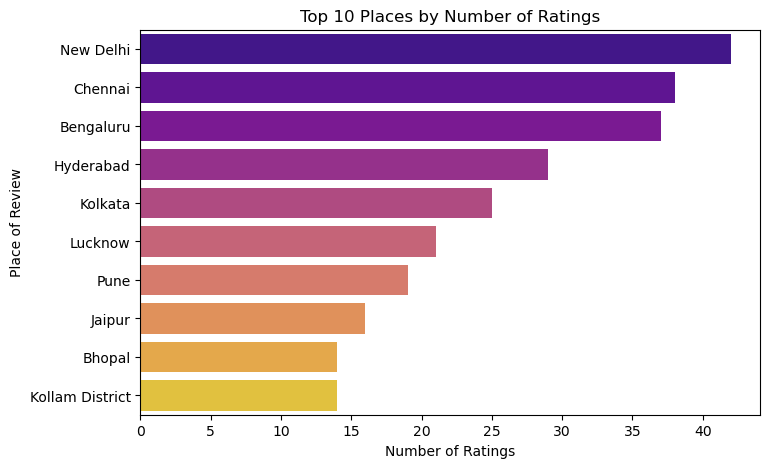

In [51]:
plt.figure(figsize=(8, 5))
sns.barplot(x=count_of_rating_by_place.values, y=count_of_rating_by_place.index, palette="plasma")
plt.title('Top 10 Places by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Place of Review')
plt.show()

Data visualizations revealed temporal and geographic trends. For instance, positive reviews were most frequent during summer months, likely due to increased sunscreen usage. Reviews from metropolitan areas like Bengaluru and Mumbai exhibited higher positivity compared to smaller towns, possibly due to better awareness and expectations.

### Monthly Sentiment Trends

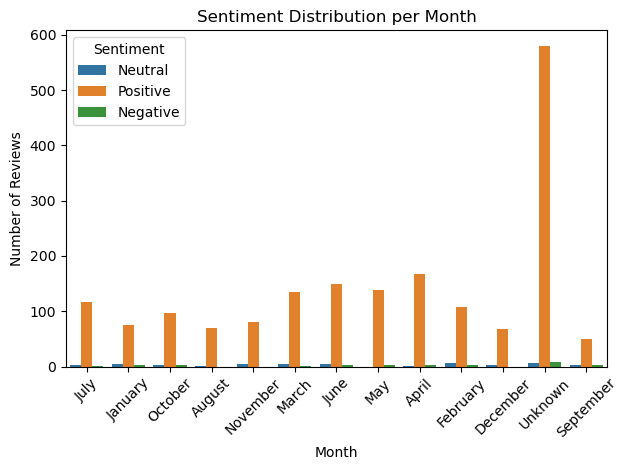

In [52]:
sns.countplot(data=df, x='Month', hue='Sentiment')
plt.title('Sentiment Distribution per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sentiment trends were observed across different months. Positive sentiment peaked during summer, suggesting seasonal relevance of sunscreen products.

In [53]:
df['Place of Review'].value_counts().head(10)

New Delhi          42
Chennai            38
Bengaluru          37
Hyderabad          29
Kolkata            25
Lucknow            21
Pune               19
Jaipur             16
Bhopal             14
Kollam District    14
Name: Place of Review, dtype: int64

### Geographic Trends

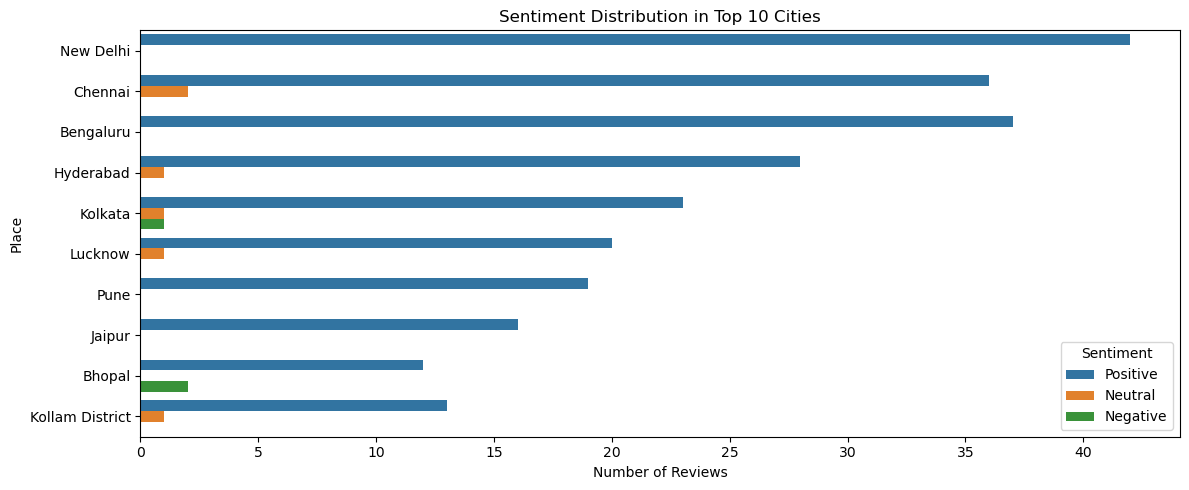

In [54]:
# Optional: focus only on top 10 places by number of reviews
top_places = df['Place of Review'].value_counts().head(10).index
filtered_df = df[df['Place of Review'].isin(top_places)]

plt.figure(figsize=(12, 5))
sns.countplot(data=filtered_df, y='Place of Review', hue='Sentiment', order=top_places)
plt.title('Sentiment Distribution in Top 10 Cities')
plt.xlabel('Number of Reviews')
plt.ylabel('Place')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


Higher positive sentiment was noticed in urban regions such as Bengaluru, Mumbai, and Delhi. In contrast, neutral or negative reviews were more frequent in Tier-2 and Tier-3 cities

In [55]:
df.columns

Index(['Name', 'Review Title', 'Up Votes', 'Down Votes', 'Review_text',
       'Ratings', 'Place of Review', 'Month', 'Year', 'cleaned_text',
       'len_before', 'len_after', 'cleaned_text1', 'len_before1', 'len_after1',
       'normalized_text', 'Sentiment'],
      dtype='object')

In [56]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

### Word Cloud

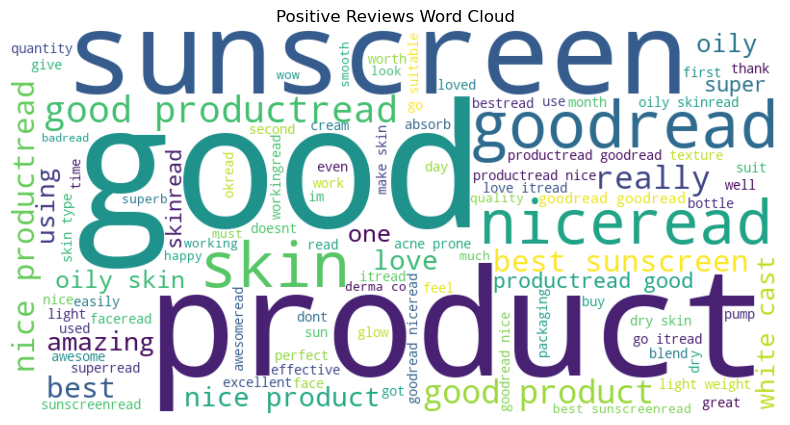

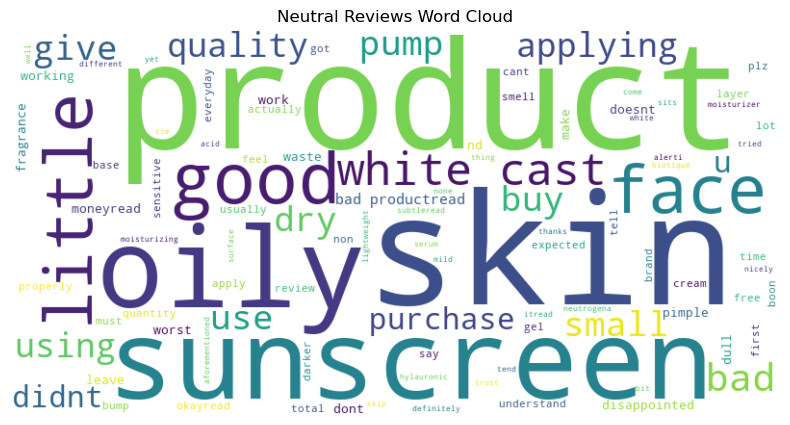

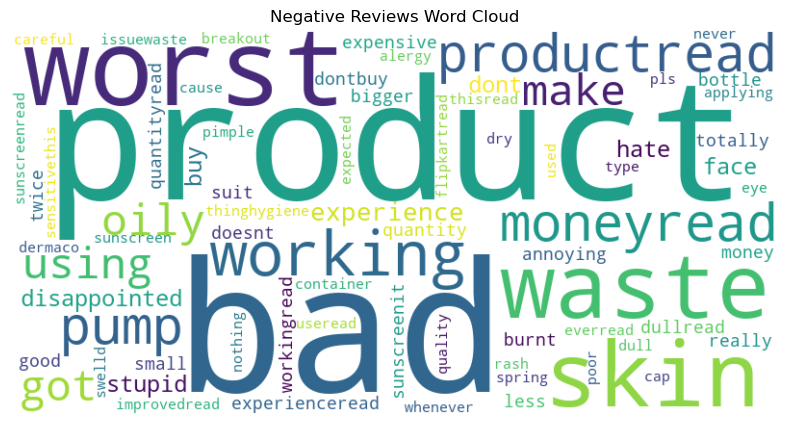

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(df[df['Sentiment'] == 'Positive']['normalized_text'].astype(str))
negative_text = " ".join(df[df['Sentiment'] == 'Negative']['normalized_text'].astype(str))
neutral_text  = " ".join(df[df['Sentiment'] == 'Neutral']['normalized_text'].astype(str))


# Generate word clouds for positive and negative sentiments
positive_cloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(positive_text)
negative_cloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(negative_text)
neutral_cloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(neutral_text)

# Plot word clouds
plt.figure(figsize=(10, 5))
plt.imshow(positive_cloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')
plt.show()


plt.figure(figsize=(10, 5))
plt.imshow(neutral_cloud, interpolation='bilinear')
plt.title('Neutral Reviews Word Cloud')
plt.axis('off')
plt.show()


plt.figure(figsize=(10, 5))
plt.imshow(negative_cloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')
plt.show()

### Conclusion

This project successfully developed a sentiment analysis system capable of extracting, analyzing, and interpreting customer reviews for Derma Co Sunscreen on Flipkart. By leveraging Python and NLP techniques, the system categorized feedback into meaningful sentiment labels, offering insights into product perception and user satisfaction.
The overall findings reveal that a majority of the reviews were positive, affirming product effectiveness, while also identifying areas for improvement through the analysis of negative feedback. This structured understanding helps product teams make informed decisions about formulation, packaging, and service.
